In [1]:
# IMDB py
from imdb import IMDb
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

ia = IMDb()

In [2]:
#Initialise the array for all interested tv shows
tv_series_drugs = ['0903747']

tv_series_whitehouse = ['1856010', '1837576']

# Array for storing ids and names of respective series
tv_series_names = {}

In [3]:
# get data for shows
def getData(tv_series):

    # Array for storing the votes count of respective series
    tv_series_votes = {}

    # Array for storing the ratings count of respective series
    tv_series_ratings = {}

    for series in tv_series:

        tv_series_name = ia.get_movie(series)
        tv_series_names[series] = tv_series_name
        print "Processing data for ", tv_series_name
        ia.update(tv_series_name, 'episodes')
        episodes = tv_series_name['episodes']
    #    print episodes

        ia.update(tv_series_name, 'episodes rating')
        start = 0
        ratings = {}
        tv_series_votes[tv_series_names[series]['title']] = {}
        tv_series_ratings[tv_series_names[series]['title']] = {}
        for season_num in episodes:
            num_episodes_season = len(episodes[season_num])
            season_episodes = tv_series_name['episodes rating'][start: start + num_episodes_season]

            votes = 0
            ratings = 0

            tiles_per_season = episodes[season_num]

            for item in season_episodes:
                votes += item['votes']
                ratings += item['rating']

            year = tiles_per_season[1]['year']
            tv_series_votes[tv_series_names[series]['title']][int(year)] = votes
            tv_series_ratings[tv_series_names[series]['title']][int(year)] = ratings / num_episodes_season
            start += len(episodes[season_num])

    return tv_series_votes, tv_series_ratings

In [4]:
def drawBarPlot(df):
    ax = df.plot.bar()
    for p in ax.patches:
        if int(p.get_height()) != 0:
            #ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

            ax.annotate(int(p.get_height()),
                        (p.get_x()+p.get_width()/2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    #ax.legend()
    plt.show()

Processing Shows for Drugs
Processing data for  Breaking Bad
{u'Breaking Bad': {2008: 62543, 2009: 94307, 2010: 98439, 2011: 113640, 2012: 291265}}


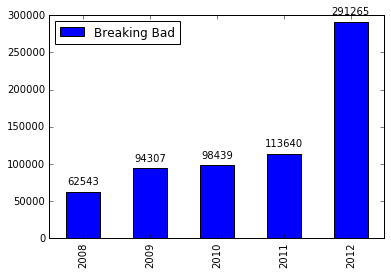

In [5]:
# Drug related shows
print "Processing Shows for Drugs"
tv_series_votes, tv_series_ratings = getData(tv_series_drugs)
print tv_series_votes
df = pd.DataFrame.from_dict(tv_series_votes)
df.fillna(0)
drawBarPlot(df)

Processing Shows for White house
Processing data for  House of Cards
Processing data for  Scandal
{u'Breaking Bad': {2008: 62543, 2009: 94307, 2010: 98439, 2011: 113640, 2012: 291265}}


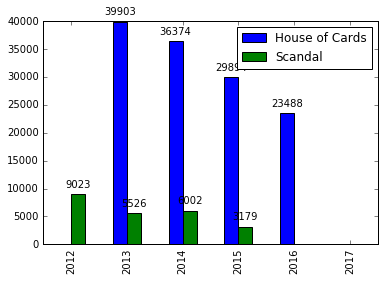

In [6]:
#Whitehouse related shows
print "Processing Shows for White house"

tv_series_votes1, tv_series_ratings1 = getData(tv_series_whitehouse)
print tv_series_votes
df = pd.DataFrame.from_dict(tv_series_votes1)
df.fillna(0)
drawBarPlot(df)

In [3]:
df1 = pd.DataFrame.from_csv("meth_lab_incidents.csv")
df1.fillna(0)
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()

rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

df1.Total.plot(ax=ax, style='b-', label='Total Meth Incidents')
df1.Amount.plot(ax=ax2, style='r-', label='Amount of Meth seized' )
df1.Votes_BB.plot(ax=ax3, style='g-', label="Votes_BB")
ax.set_ylabel('No of Meth Incidents ')
ax2.set_ylabel('Amount of Meth Siezed in the US')
ax3.set_ylabel('Votes for Breaking Bad')
#plt.legend()



lines = ax.get_lines() + ax2.get_lines() + ax3.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper center')

plt.title('Cumulative plot of Meth Incidents vs Amount of Meth Siezed vs Popularity of Breaking Bad')
plt.show()

NameError: name 'pd' is not defined

In [1]:
# Cumulative graph for HOC and Number of appointments
df1 = pd.DataFrame.from_csv("data.csv")
df1.fillna(0, inplace=True)
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.subplots_adjust(right=0.75)

df1.Number_of_Visitors.plot(ax=ax, style='b-', label='Total Number of Appointments')
df1.Votes_HOC.plot(ax=ax2, style='r-', label='Number of votes for House of Cards')
ax.set_ylabel('Total Number of Appointments')
ax2.set_ylabel('Number of votes for House of Cards')


lines = ax.get_lines() + ax2.get_lines()

ax.legend(lines, [line.get_label() for line in lines], loc='lower center')

plt.title('Cumulative plot Num of Appointment vs HOC populatity')
plt.show()

NameError: name 'pd' is not defined